In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

DATA_FOLDER = "data"
PLOTS_FOLDER = "plots"

plots_path = Path(PLOTS_FOLDER)
plots_path.mkdir(parents=True, exist_ok=True)

data_list = []
for file in Path(DATA_FOLDER).iterdir():
    print(file.stem)
    data = pd.read_csv(file, index_col=0)
    data_list.append(data)

all_data = pd.concat(data_list, ignore_index=True)

# Best value gain at each iteration
problems_grouped = all_data.groupby(["problem", "dim", "seed", "metric"], dropna=False)
all_data["f_best_i"] = problems_grouped[["f"]].transform("cummin")
all_data["f_gain"] = problems_grouped[["f_best_i"]].transform("diff")

problems_grouped = all_data.groupby(["problem", "dim"], dropna=False)
# Best value found among all runs (seed & metrics)
all_data["f_best_min"] = problems_grouped[["f_best"]].transform("min")
# Max of best values found in each run for that problem (seed & metrics)
all_data["f_best_max"] = problems_grouped[["f_best"]].transform("max")

for keys, data in all_data.groupby(["problem", "dim", "seed", "metric"], dropna=False):
  assert (data["f_best"] == data["f"].min()).all()

for keys, data in all_data.groupby(["problem", "dim"], dropna=False):
  assert (data["f_best_max"] == data["f_best"].max()).all()

bbob.attractive_sector_2 n_init=10 n_restarts=10 metric=none
bbob.attractive_sector_2 n_init=10 n_restarts=10 metric=predicted
bbob.attractive_sector_2 n_init=10 n_restarts=10 metric=R2_cv
bbob.attractive_sector_2 n_init=10 n_restarts=10 metric=suitability_ext
bbob.attractive_sector_2 n_init=10 n_restarts=10 metric=vm_angles_ext
bbob.attractive_sector_4 n_init=20 n_restarts=10 metric=none
bbob.attractive_sector_4 n_init=20 n_restarts=10 metric=predicted
bbob.attractive_sector_4 n_init=20 n_restarts=10 metric=R2_cv
bbob.attractive_sector_4 n_init=20 n_restarts=10 metric=suitability_ext
bbob.attractive_sector_4 n_init=20 n_restarts=10 metric=vm_angles_ext
bbob.attractive_sector_8 n_init=40 n_restarts=10 metric=none
bbob.attractive_sector_8 n_init=40 n_restarts=10 metric=predicted
bbob.attractive_sector_8 n_init=40 n_restarts=10 metric=R2_cv
bbob.attractive_sector_8 n_init=40 n_restarts=10 metric=suitability_ext
bbob.attractive_sector_8 n_init=40 n_restarts=10 metric=vm_angles_ext
bbob.be

In [2]:
dict(zip(*np.unique(all_data[all_data["metric"] == "R2_cv"]["nu"].dropna(), return_counts=True)))

{0.5: 12962, 1.0: 4708, 1.5: 2610, 2.0: 1918, 2.5: 1495, 3.0: 3468, inf: 6439}

In [3]:
run_results = []
for keys, data in all_data.groupby(["problem", "dim", "seed", "metric"], dropna=False):
    problem, dim, seed, metric = keys

    f_best = data["f_best"].values[0]
    f_best_min = data["f_best_min"].values[0]
    f_best_max = data["f_best_max"].values[0]
    f_solution = data["solution_f"].values[0]
    assert (f_best == data["f_best"]).all()
    assert (f_best_min == data["f_best_min"]).all()
    assert (f_best_max == data["f_best_max"]).all()
    assert (f_solution == data["solution_f"]).all()
    assert f_solution <= f_best_min <= f_best <= f_best_max

    f_best_range = f_best_max - f_best_min
    f_best_norm = 0
    if f_best_range > 0:
        f_best_norm = (f_best - f_best_min) / f_best_range

    f_best_range = f_best_max - f_solution
    f_best_norm_solution = 0
    if f_best_range > 0:
        f_best_norm_solution = (f_best - f_solution) / f_best_range

    run_results.append(
        pd.Series(
            {
                "problem": problem,
                "dim": dim,
                "seed": seed,
                "metric": metric,
                "f_best": f_best,
                "f_best_norm": f_best_norm,
                "f_best_norm_solution": f_best_norm_solution,
                "time": data["time"].sum(),
            }
        )
    )

run_results = pd.DataFrame(run_results)
run_results_mean = run_results.groupby(
    ["problem", "dim", "metric"], as_index=False
).mean("f")

metrics_best = {}
metrics_best_mean = {}

for (problem, dim, seed), data in run_results.groupby(["problem", "dim", "seed"]):
    f_best = data["f_best_norm"].min()
    for metric, f_metric_best in data[["metric", "f_best_norm"]].values:
        if np.abs(f_metric_best - f_best) > 0:
            continue
        metrics_best.setdefault(metric, []).append(f"{problem}_{dim}_{seed}")

for (problem, dim), data in run_results_mean.groupby(["problem", "dim"]):
    f_best = data["f_best_norm"].min()
    for metric, f_metric_best in data[["metric", "f_best_norm"]].values:
        if np.abs(f_metric_best - f_best) > 0:
            continue
        print(f"{problem + str(dim):30} {metric:20} {f_metric_best:3f}")
        metrics_best_mean.setdefault(metric, []).append(f"{problem}_{dim}")
    print()

print("\n--- metrics_best ---")
[print(f"{m}: {len(metrics_best[m])}") for m in sorted(metrics_best)]
print("\n--- metrics_best_mean ---")
[print(f"{m}: {len(metrics_best_mean[m])}") for m in sorted(metrics_best_mean)]

bbob.attractive_sector2        R2_cv                0.213404

bbob.attractive_sector4        R2_cv                0.334497

bbob.attractive_sector8        predicted            0.190195

bbob.bent_cigar2               predicted            0.055989

bbob.bent_cigar4               vm_angles_ext        0.123602

bbob.bent_cigar8               vm_angles_ext        0.485077

bbob.bueche_rastrigin2         vm_angles_ext        0.226813

bbob.bueche_rastrigin4         predicted            0.413862

bbob.bueche_rastrigin8         predicted            0.255464

bbob.different_powers2         vm_angles_ext        0.310870

bbob.different_powers4         suitability_ext      0.323533

bbob.different_powers8         vm_angles_ext        0.280531

bbob.discus2                   R2_cv                0.010451

bbob.discus4                   vm_angles_ext        0.148932

bbob.discus8                   none                 0.044731

bbob.ellipsoid2                none                 0.018891

bbob.ell

[None, None, None, None, None]

In [4]:
total_n_runs = len(run_results.groupby(["problem", "dim", "seed"]))
total_n_problems = len(run_results.groupby(["problem", "dim"]))

run_results_mean[run_results_mean["problem"] == "bbob.ellipsoid"]
run_results[run_results["problem"] == "bbob.ellipsoid"]

summary = run_results.groupby(["metric"]).mean("f_best_norm")
summary

,dim,seed,f_best,f_best_norm,f_best_norm_solution,time
metric,,,,,,
R2_cv,4.666667,4.5,319014.454679,0.303822,0.359797,457.990407
none,4.666667,4.5,330472.243679,0.379260,0.423992,24.521438
predicted,4.666667,4.5,340648.505639,0.290897,0.353173,144.796345
suitability_ext,4.666667,4.5,318185.599530,0.305281,0.362463,211.125904
vm_angles_ext,4.666667,4.5,284557.123815,0.305258,0.362375,173.912397


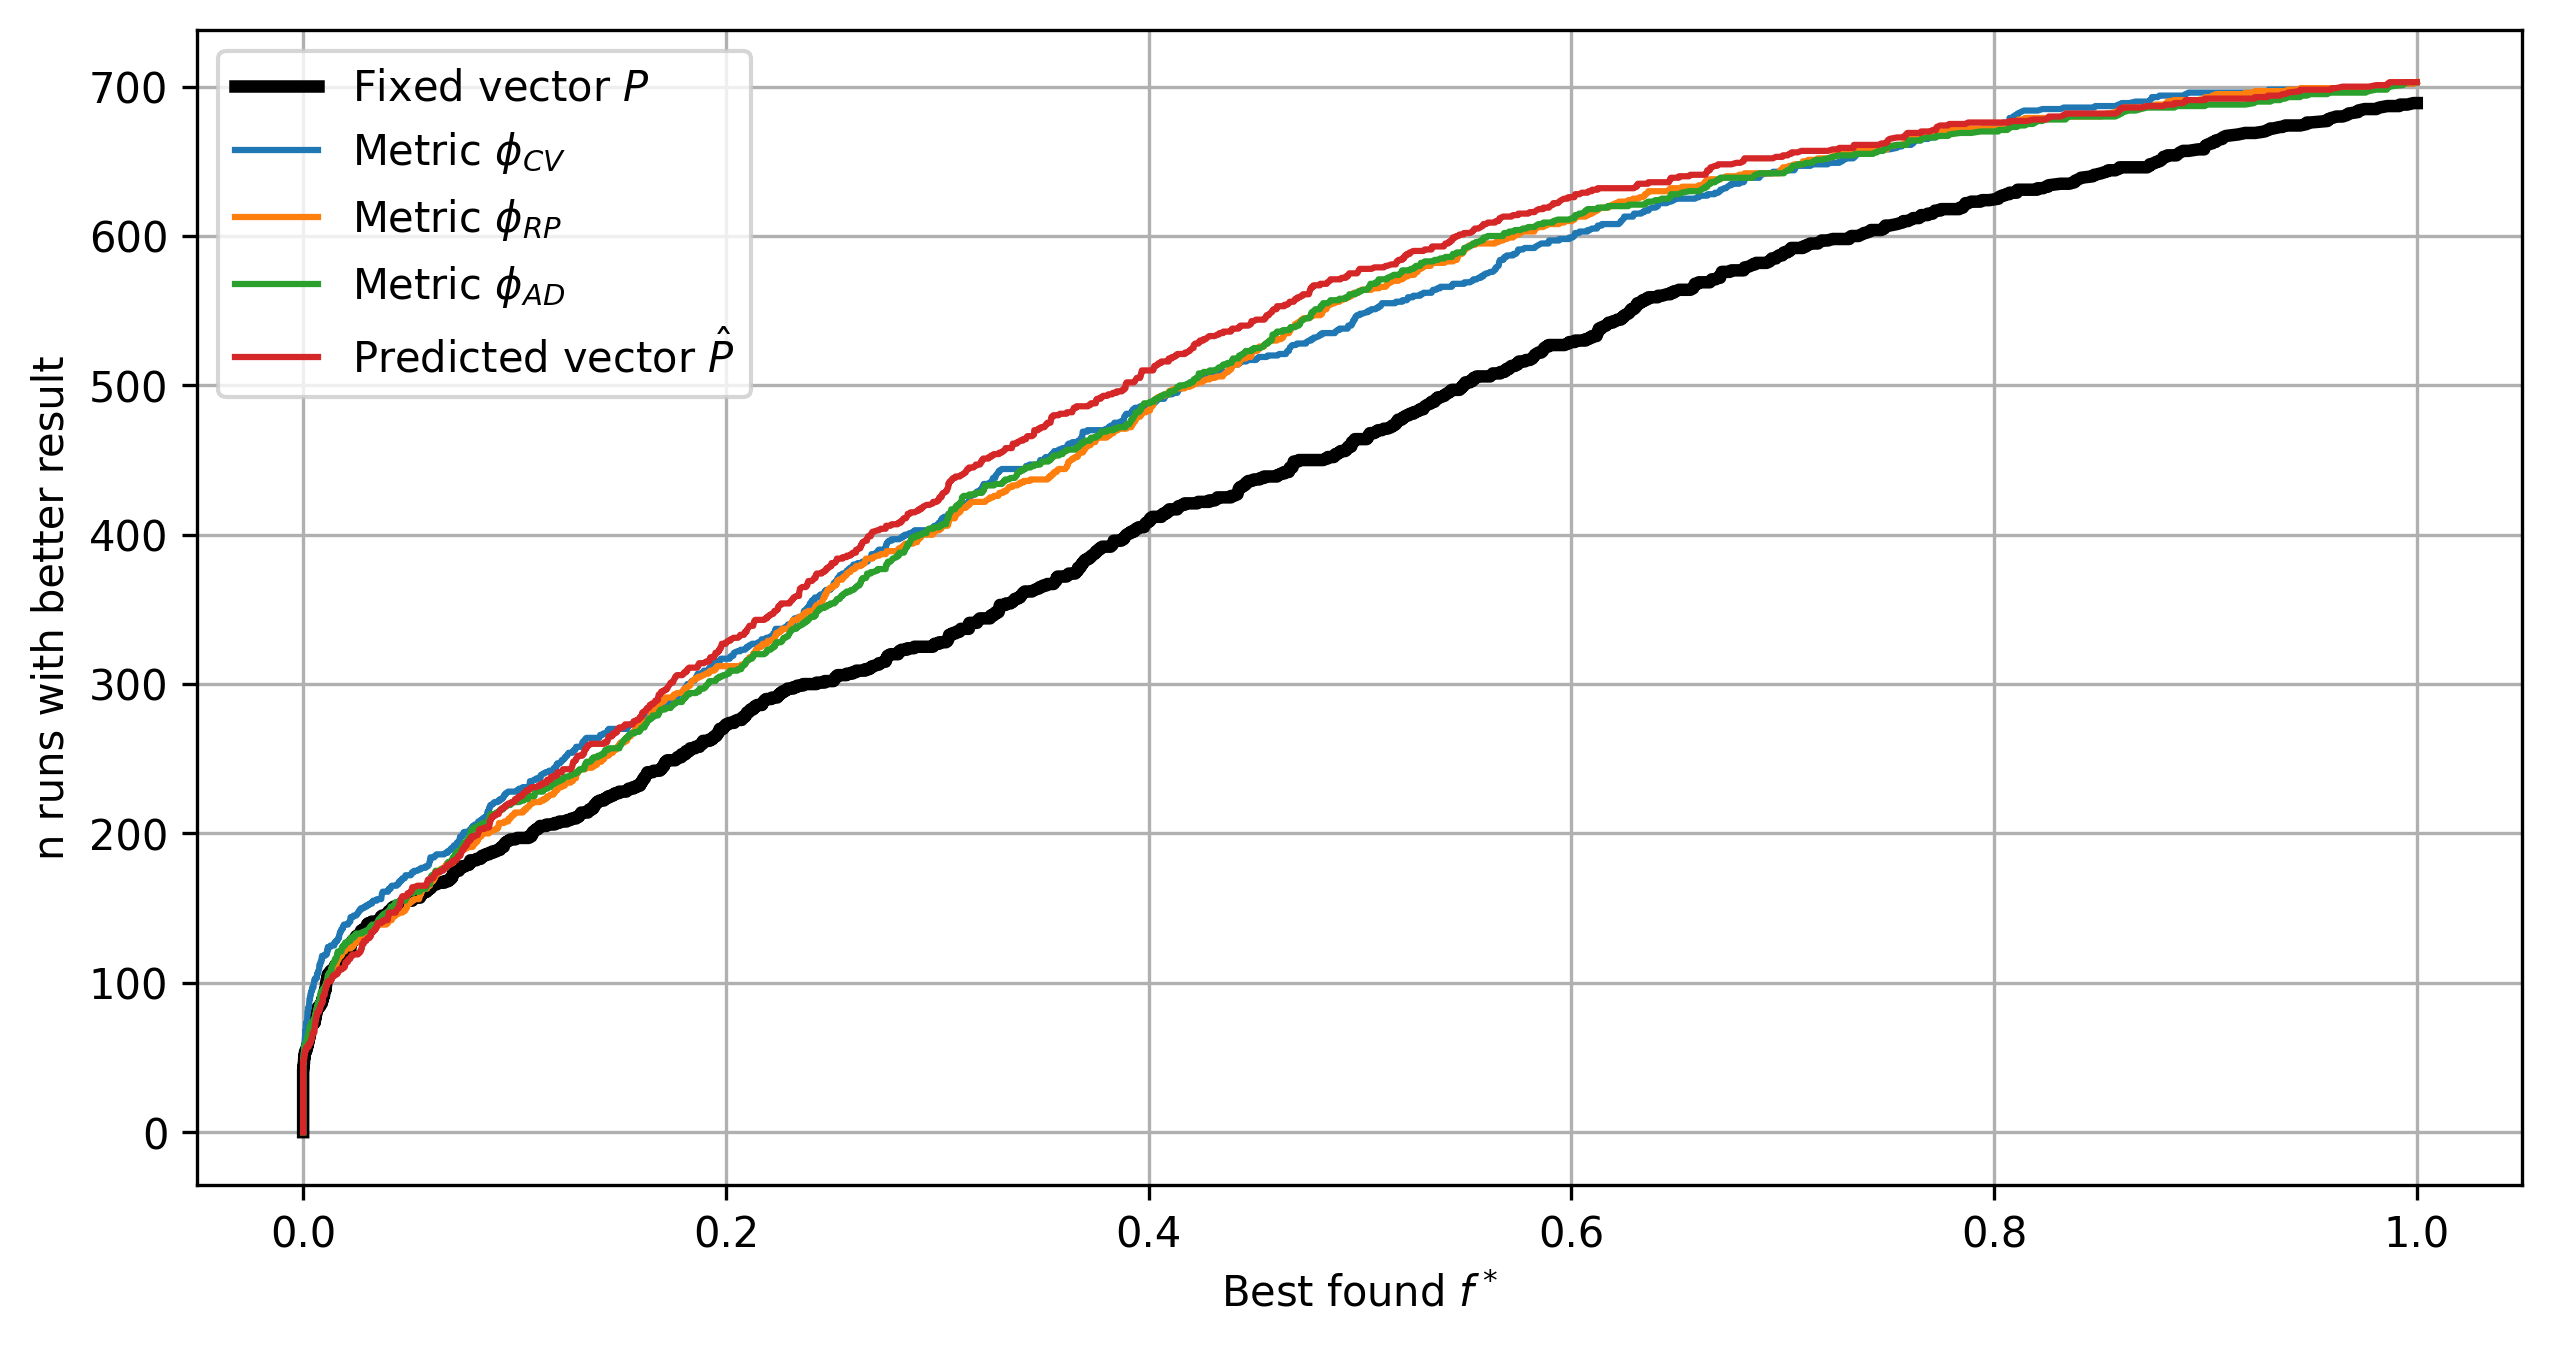

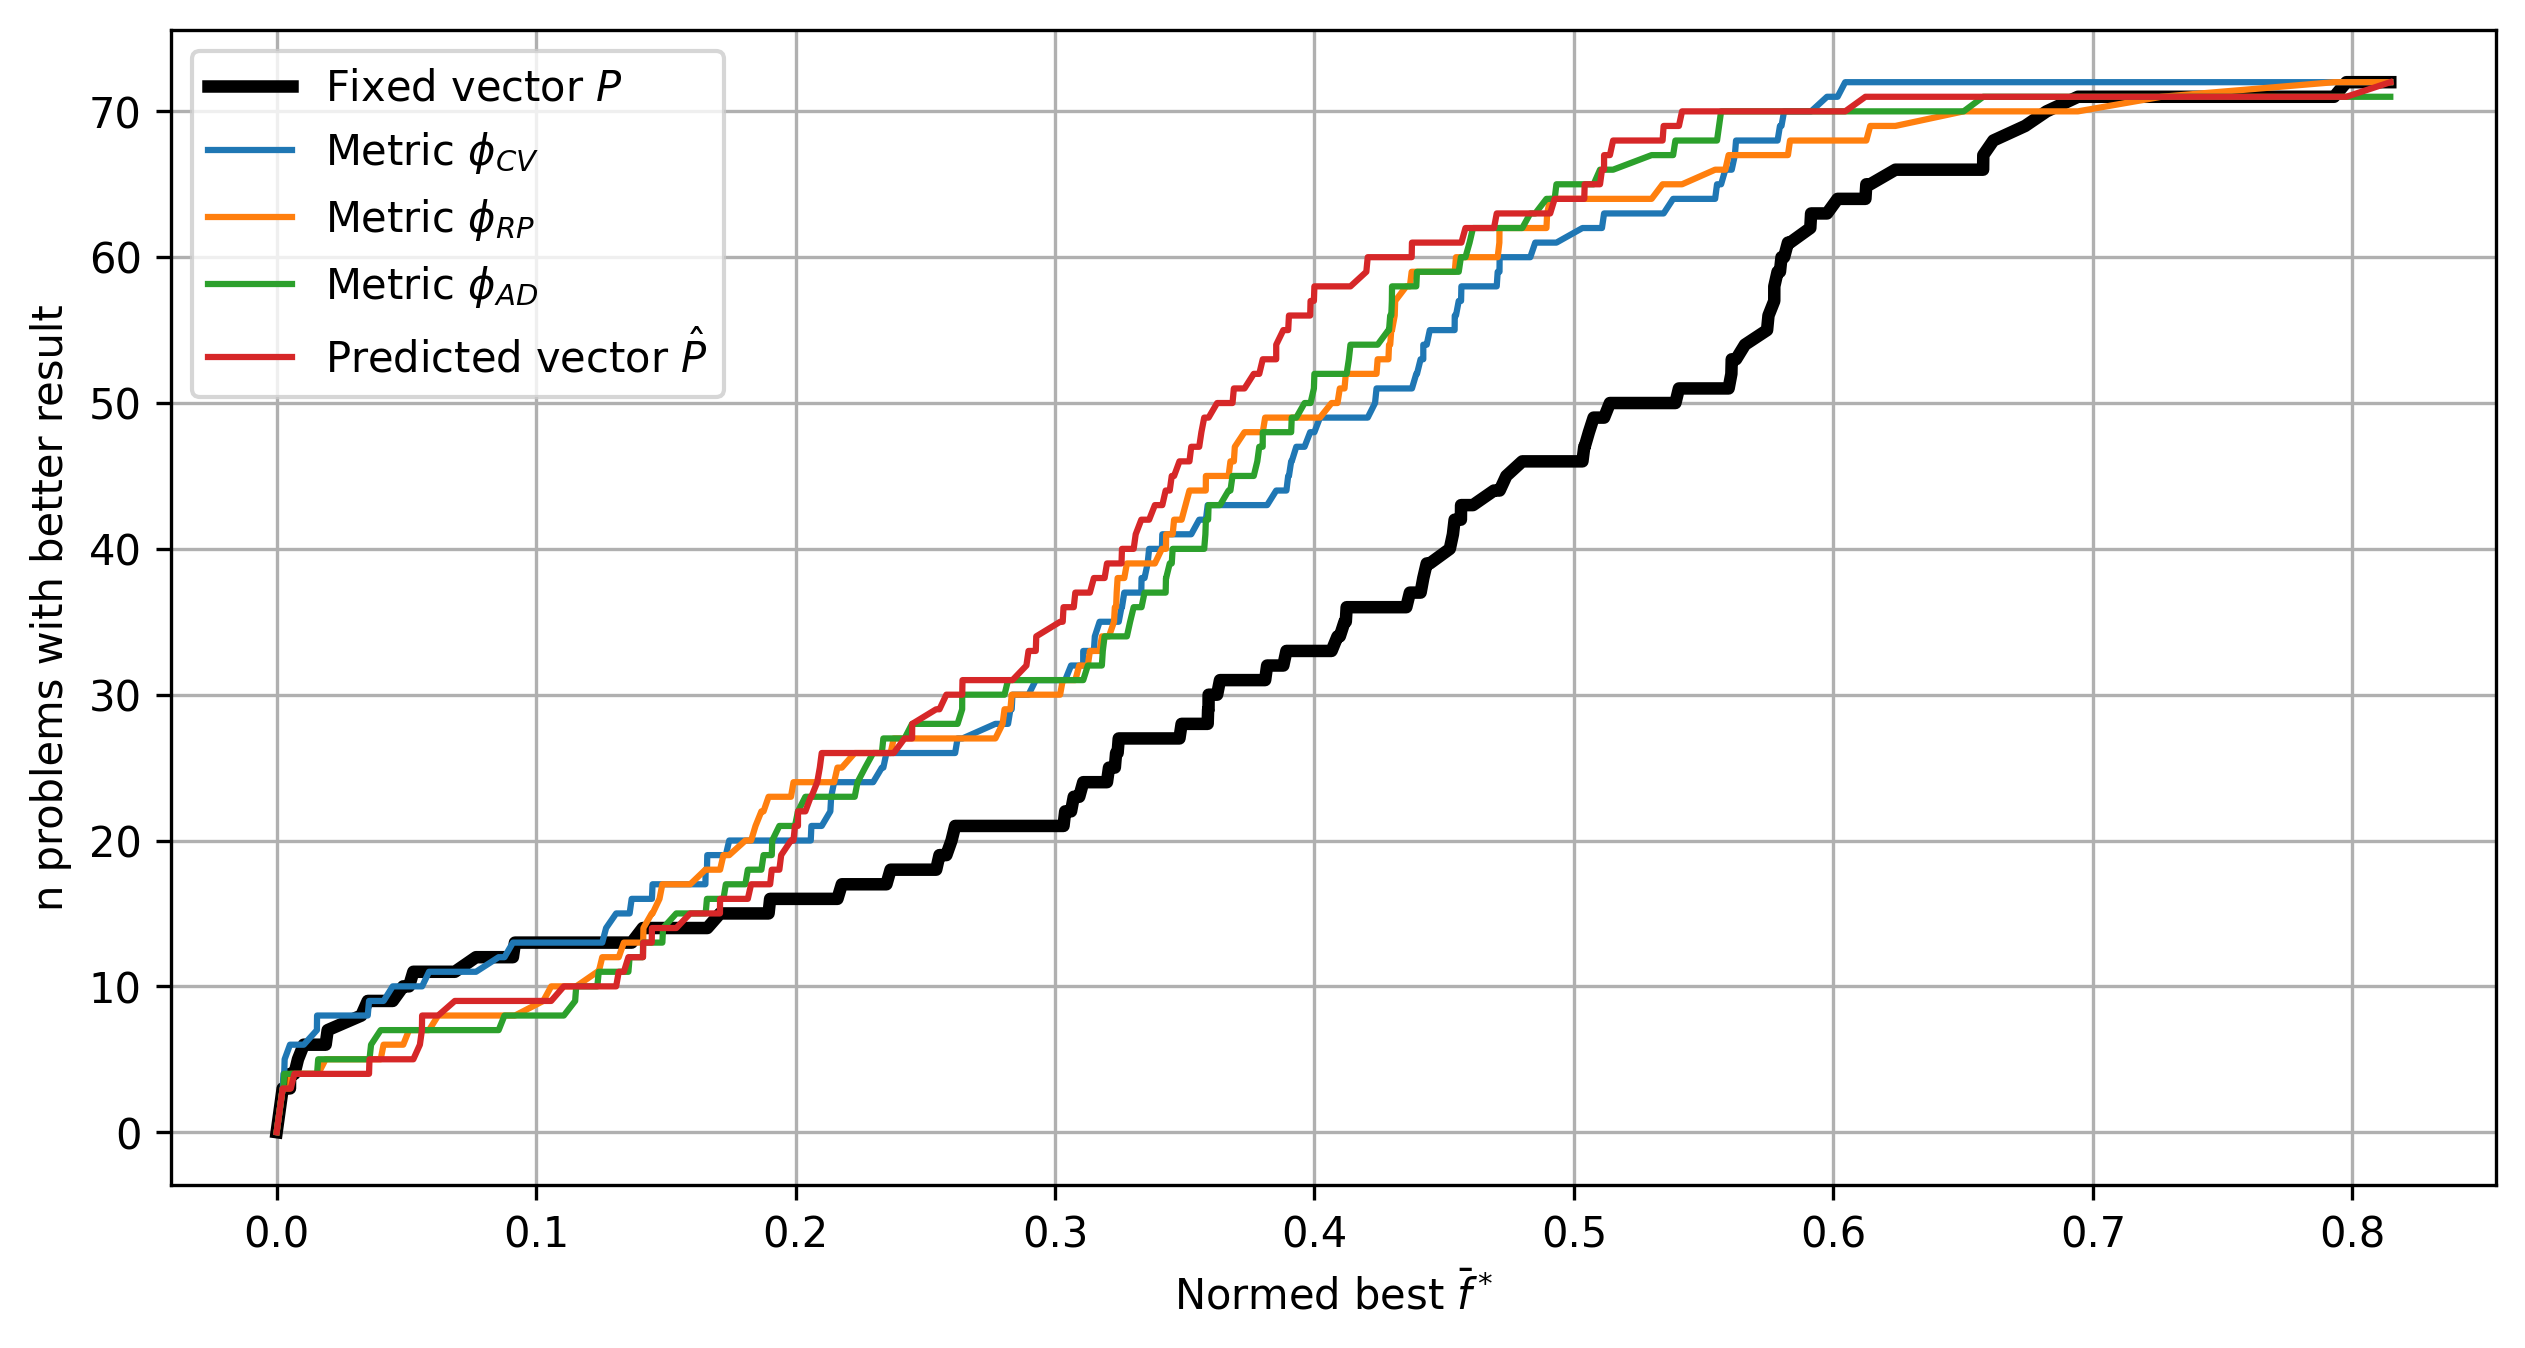

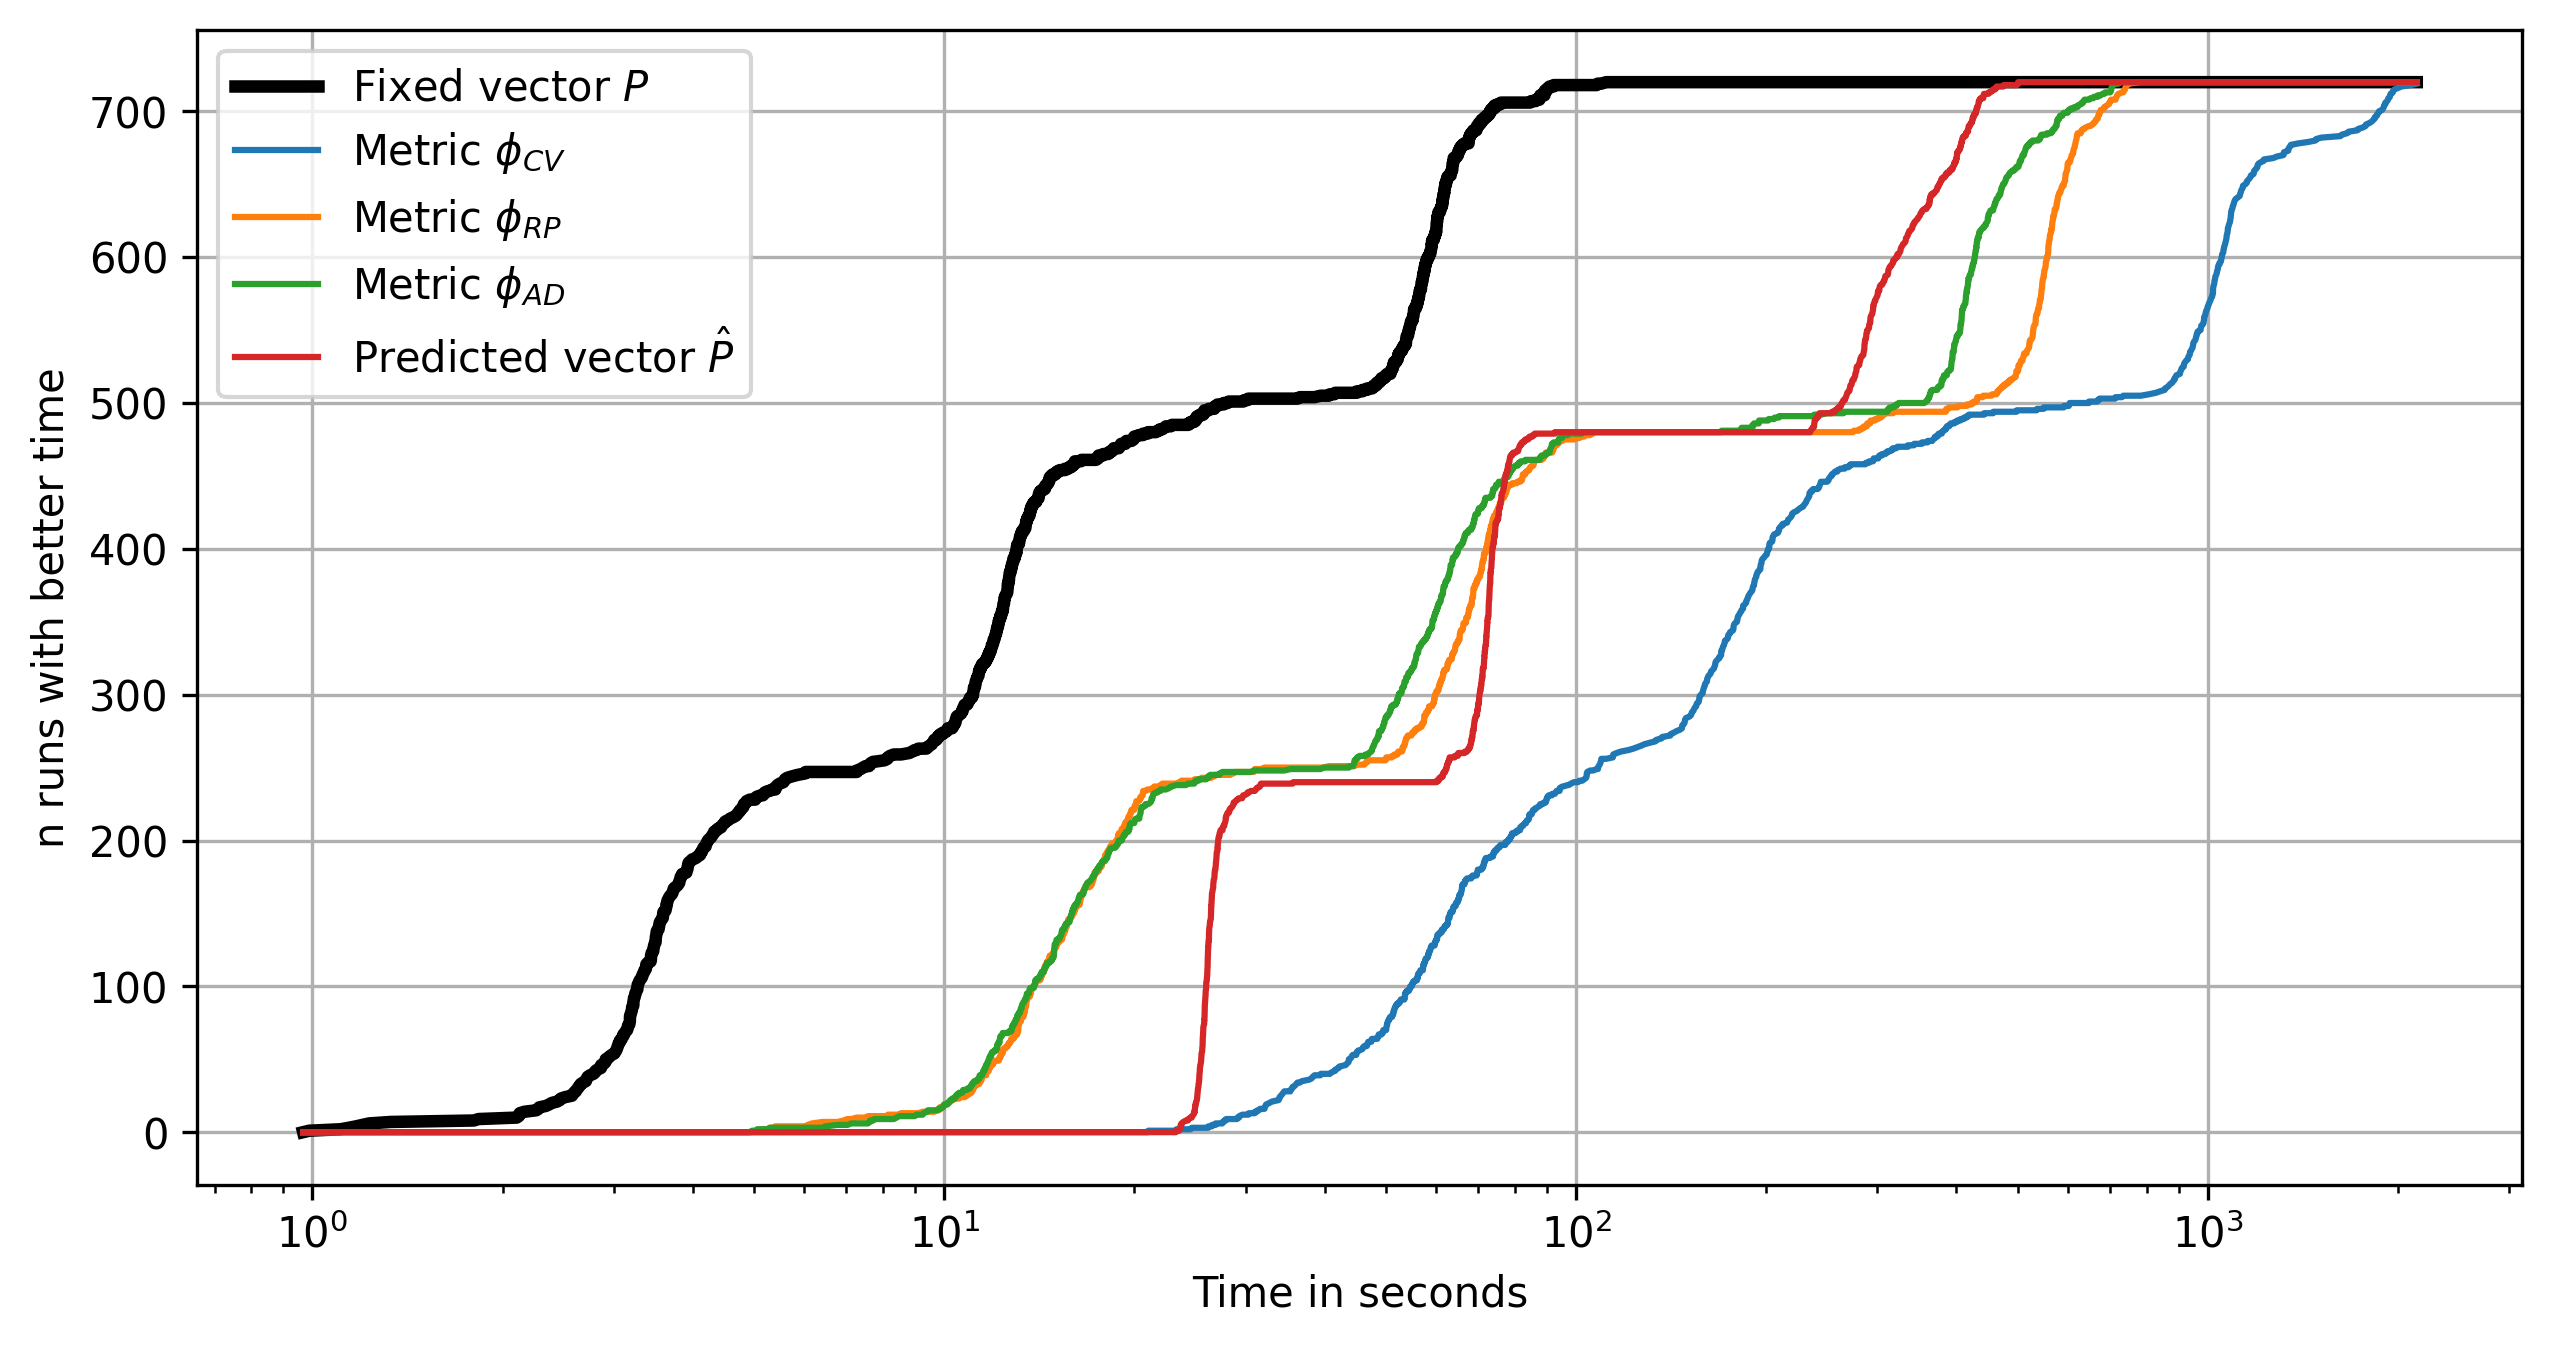

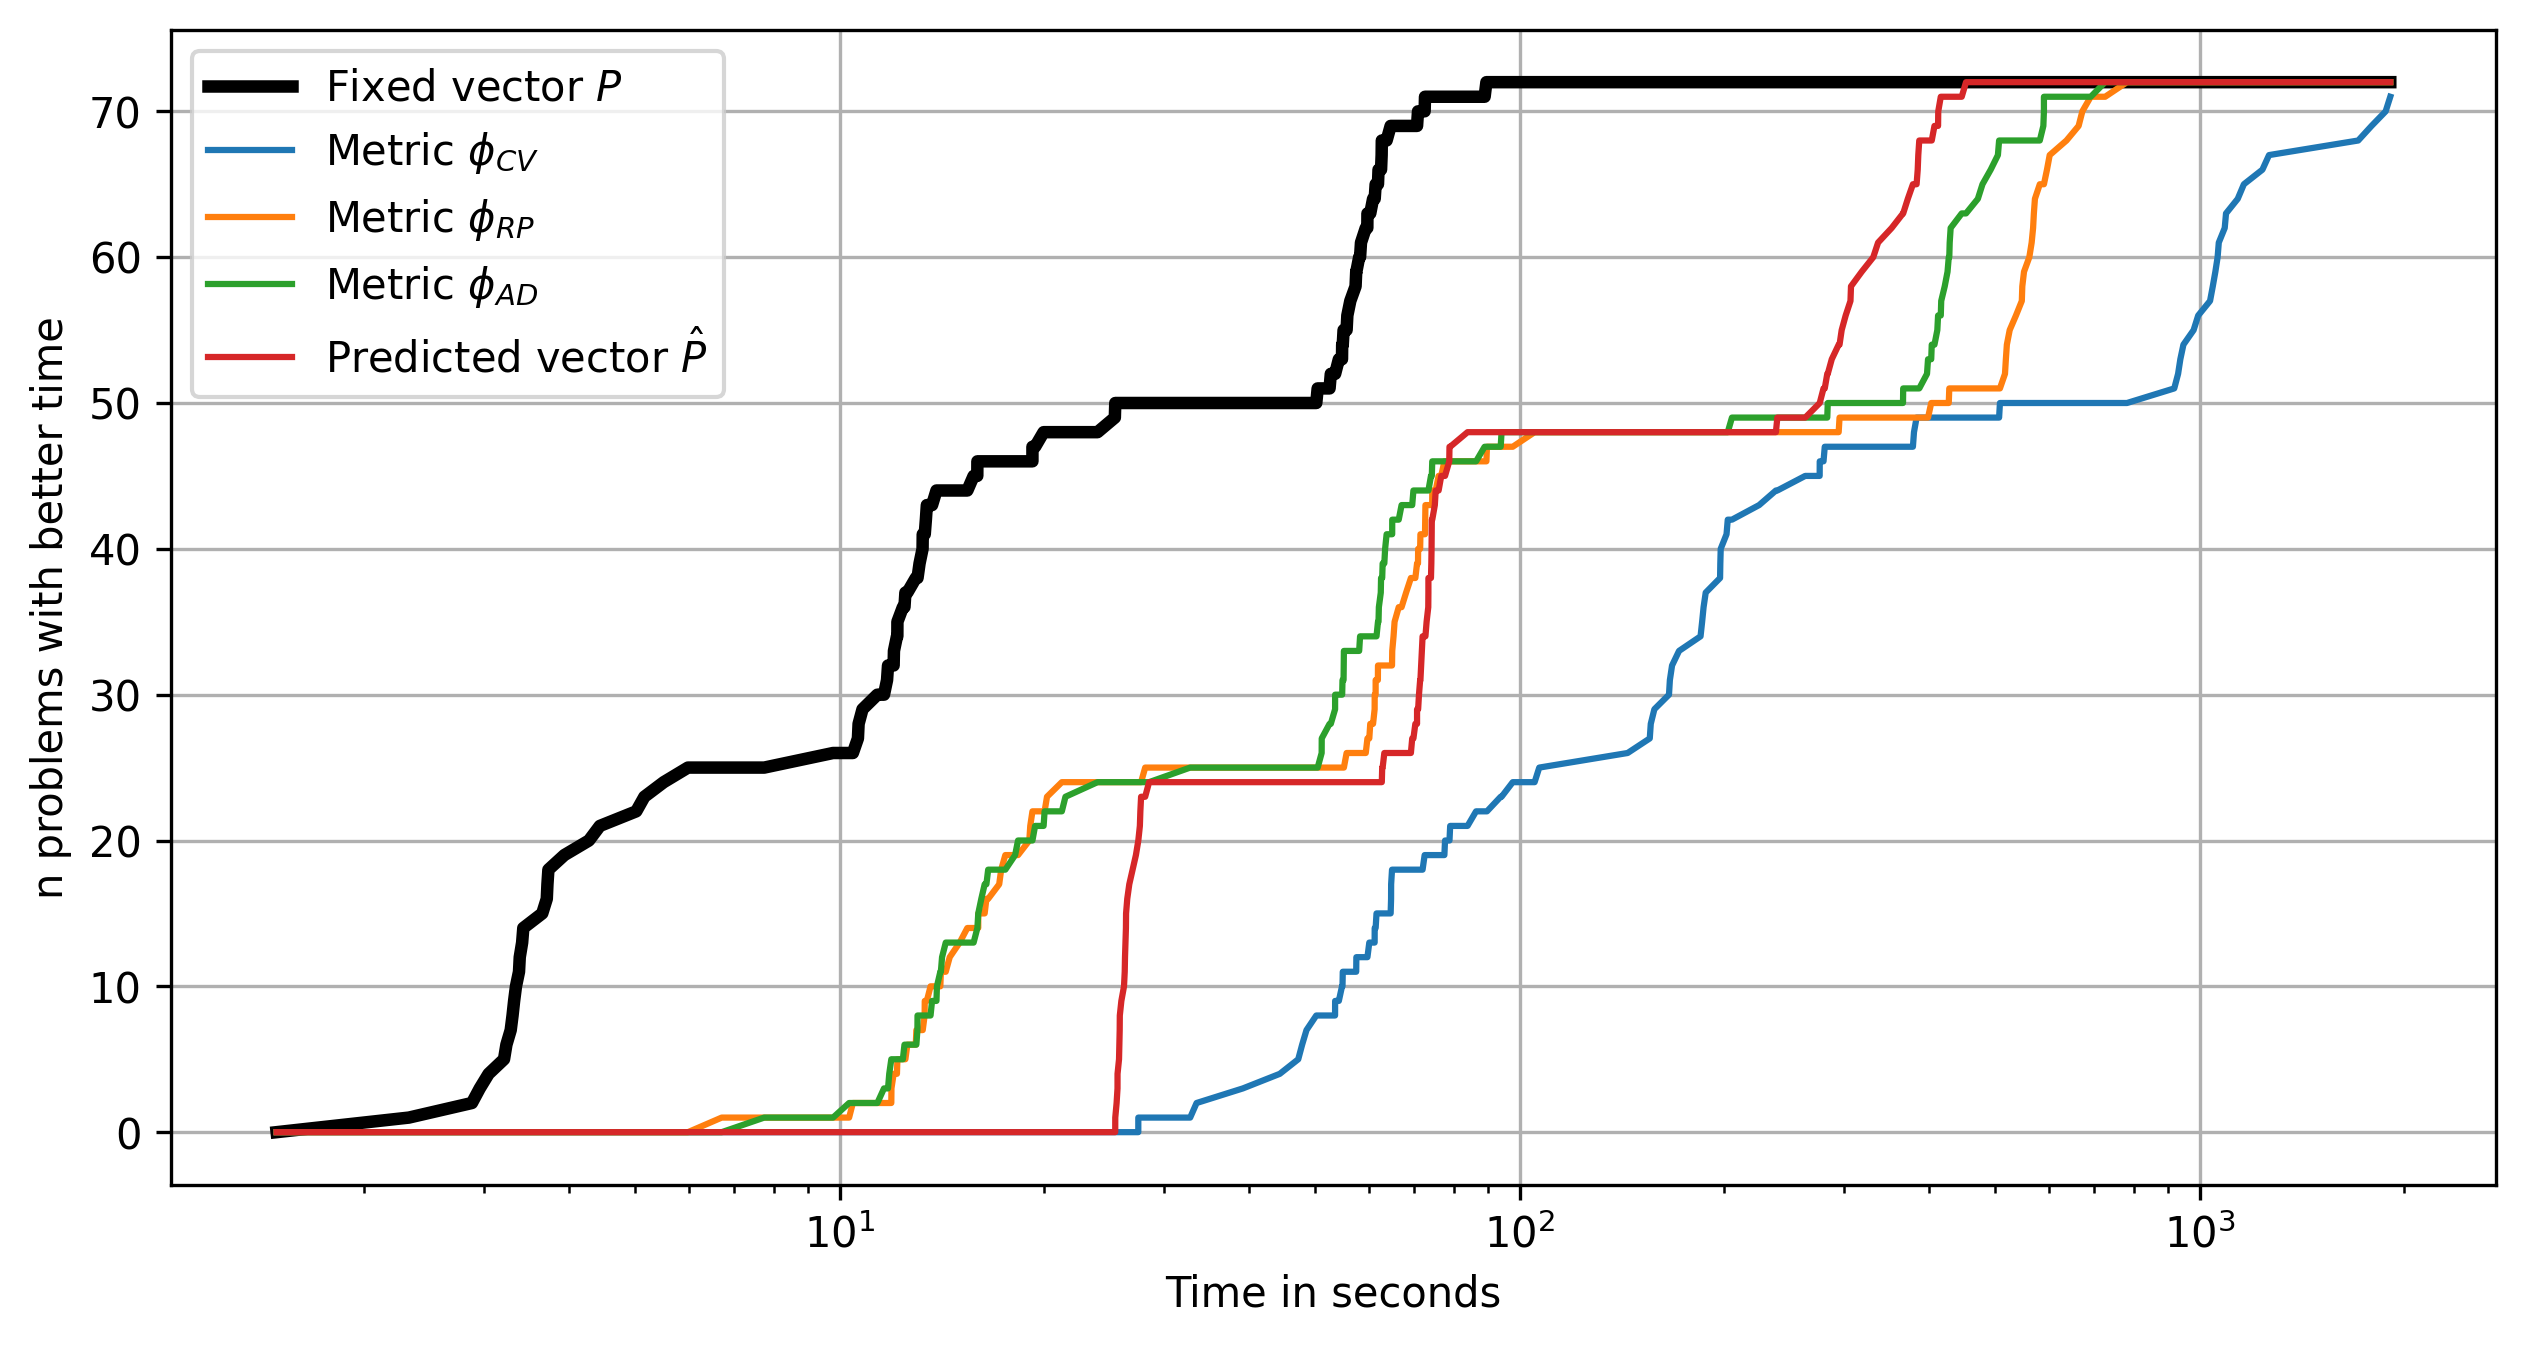

In [5]:
plt.rc("figure", figsize=(10, 5), dpi=300)
labels = {
    "none": "Fixed vector $P$",
    "R2_cv": "Metric $\phi_{CV}$",
    "predicted": "Predicted vector $\hat{P}$",
    "suitability_ext": "Metric $\phi_{RP}$",
    "vm_angles_ext": "Metric $\phi_{AD}$",
}
y_labels = {
    "f_best_norm": "with better result",
    "time": "with better time",
}
x_labels = {
    "f_best_norm": r"Normed best $\bar{f}^*$",
    "time": "Time in seconds",
}
x_labels_all = {
    "f_best_norm": r"Best found $f^*$",
    "time": "Time in seconds",
}

metrics = ["none", "R2_cv", "suitability_ext", "vm_angles_ext", "predicted"]

for column, scale in [("f_best_norm", "linear"), ("time", "log")]:
    values = np.unique(run_results[column])
    for metric in metrics:
        data_metric = run_results[run_results["metric"] == metric]
        ratios = [sum(data_metric[column] < value) for value in values]
        n_runs_best = ""  # f"(best for {len(metrics_best[metric])}/{total_n_runs})"
        color = "k" if metric == "none" else None
        linewidth = 3 if metric == "none" else None
        plt.plot(
            values,
            ratios,
            c=color,
            linewidth=linewidth,
            label=f"{labels.get(metric, metric)} {n_runs_best}",
        )
    title = f"performance {column}[{scale}] (all) {DATA_FOLDER} "
    # plt.title(title)
    plt.grid()
    plt.legend()
    plt.xlabel(x_labels_all.get(column, column))
    plt.ylabel(f"n runs {y_labels.get(column, column)}")
    plt.xscale(scale)
    # plt.savefig(plots_path / f"{title}.png")
    plt.show()
    plt.close()

    values = np.unique(run_results_mean[column])
    for metric in metrics:
        data_metric = run_results_mean[run_results_mean["metric"] == metric]
        ratios = [sum(data_metric[column] < value) for value in values]
        n_runs_best = (
            ""  # f"(best for {len(metrics_best_mean[metric])}/{total_n_problems})"
        )
        color = "k" if metric == "none" else None
        linewidth = 3 if metric == "none" else None
        plt.plot(
            values,
            ratios,
            c=color,
            linewidth=linewidth,
            label=f"{labels.get(metric, metric)} {n_runs_best}",
        )
    title = f"performance {column}[{scale}] (average) {DATA_FOLDER} "
    # plt.title(title)
    plt.grid()
    plt.legend()
    plt.xlabel(x_labels.get(column, column))
    plt.ylabel(f"n problems {y_labels.get(column, column)}")
    plt.xscale(scale)
    # plt.savefig(plots_path / f"{title}.png")
    plt.show()
    plt.close()